# Demo Laplace Mechanism Confidence Interval #

Exact CI: 2.99573227355399


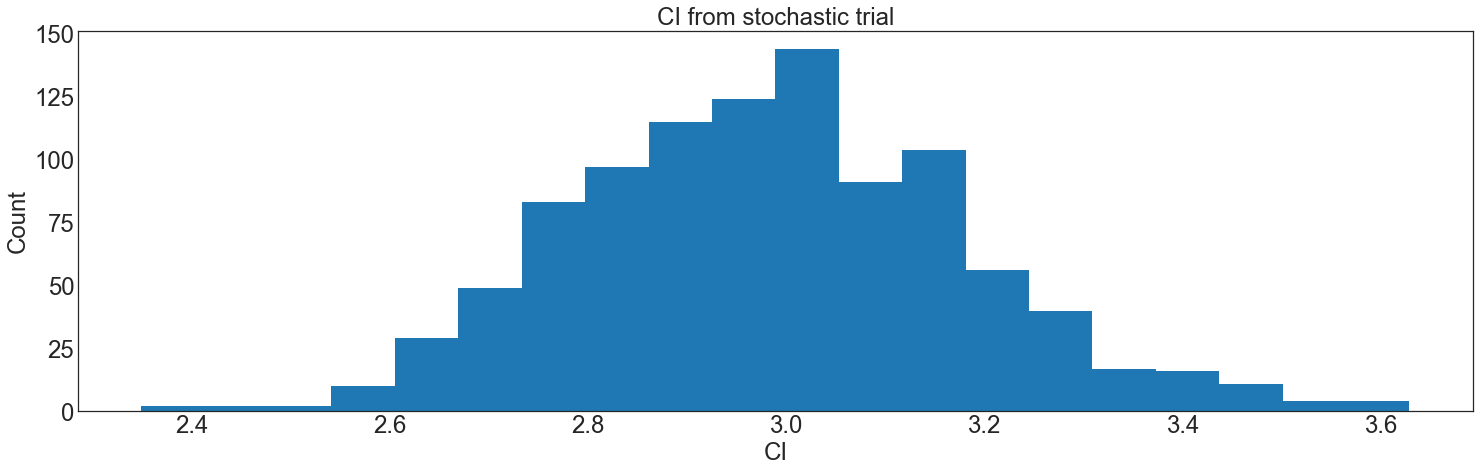

In [1]:
from eeprivacy import (laplace_mechanism, laplace_mechanism_confidence_interval, laplace_mechanism_epsilon_for_confidence_interval,
private_mean_with_laplace)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

np.random.seed(1234) # Fix seed for deterministic documentation

mpl.style.use("seaborn-white")

MD = 20
LG = 24
plt.rcParams.update({
    "figure.figsize": [25, 7],
    "legend.fontsize": MD,
    "axes.labelsize": LG,
    "axes.titlesize": LG,
    "xtick.labelsize": LG,
    "ytick.labelsize": LG,
})

# Exact
ci = laplace_mechanism_confidence_interval(
  epsilon=1.0, sensitivity=1, confidence=0.95
)
print(f"Exact CI: {ci}")

# Stochastic
trials = []

for t in range(1000):

  res = laplace_mechanism(
    values=np.zeros(1000), 
    epsilon=1.0, 
    sensitivity=1.0
  )
  trials.append(np.quantile(res, 0.975))

plt.hist(trials, bins=20)
plt.title("CI from stochastic trial")
plt.xlabel("CI")
plt.ylabel("Count")
plt.show()


In [2]:
# Now the reverse
epsilon = laplace_mechanism_epsilon_for_confidence_interval(
  target_ci=3,
  sensitivity=1,
  confidence=0.95
)
print(epsilon)

epsilon = laplace_mechanism_epsilon_for_confidence_interval(
  target_ci=3,
  sensitivity=1,
  confidence=0.95
)
print(epsilon)

def compute_laplace_epsilon(target_ci, sensitivity, quantile=.95):
  """
  Returns the ε for the Laplace Mechanism that will produce outputs 
  +/-`target_ci` at `quantile` confidence for queries with `sensitivity`.

  e.g.

  compute_laplace_epsilon(5, 1, quantile=0.99)

  Returns ε for counting queries that should be within +/-5 of the true count
  at 99% confidence.
  """
  quantile = 2 * quantile - 1
  epsilon = -sensitivity * np.log(2 - 2 * quantile) / target_ci
  return epsilon


compute_laplace_epsilon(17520, 8760, 0.95)


0.9985774245179967
0.9985774245179967


0.8047189562170497

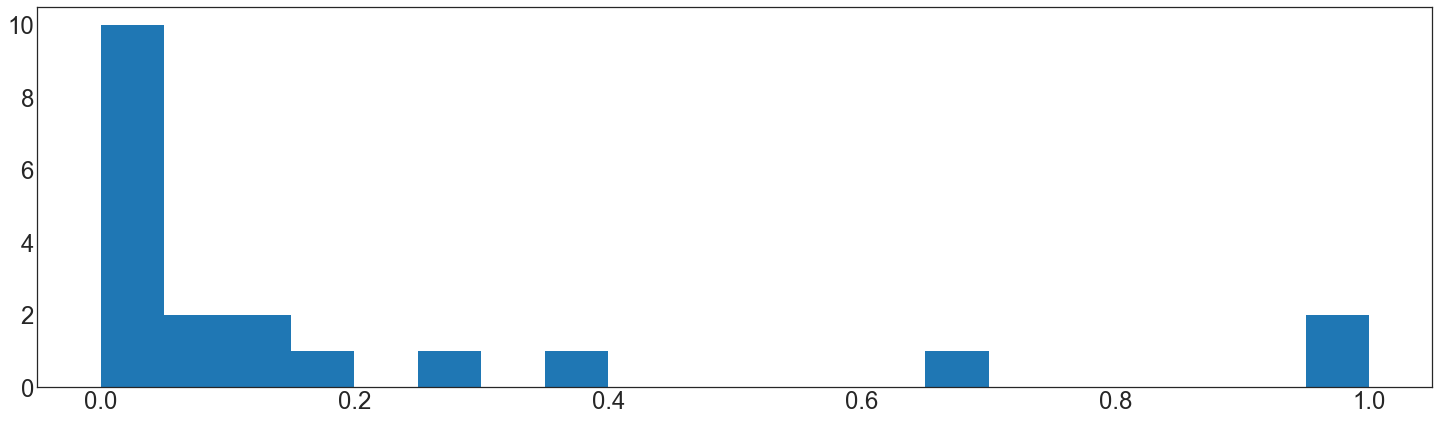

4.0297924285852025


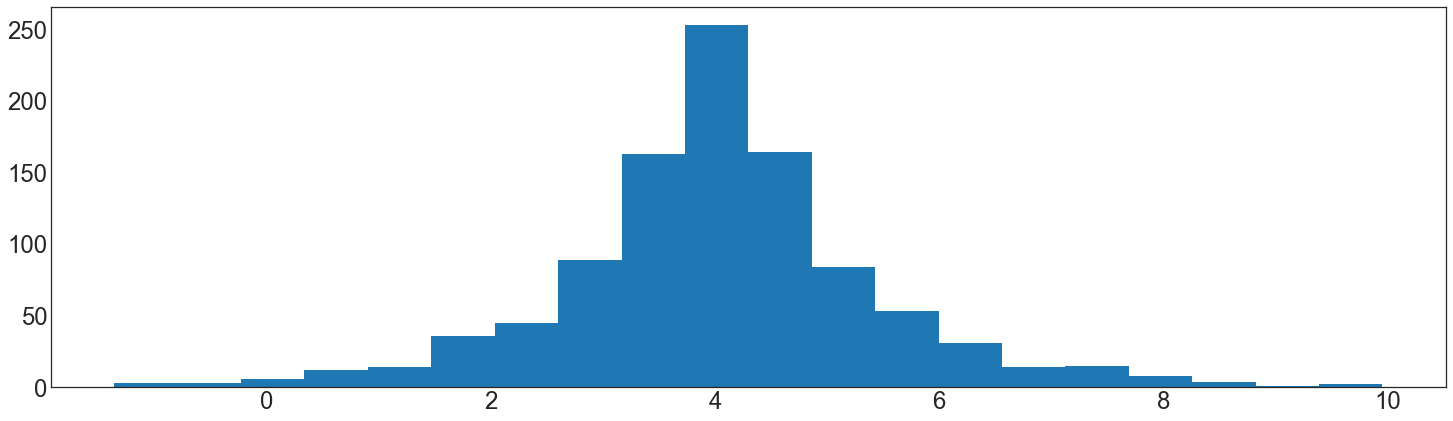

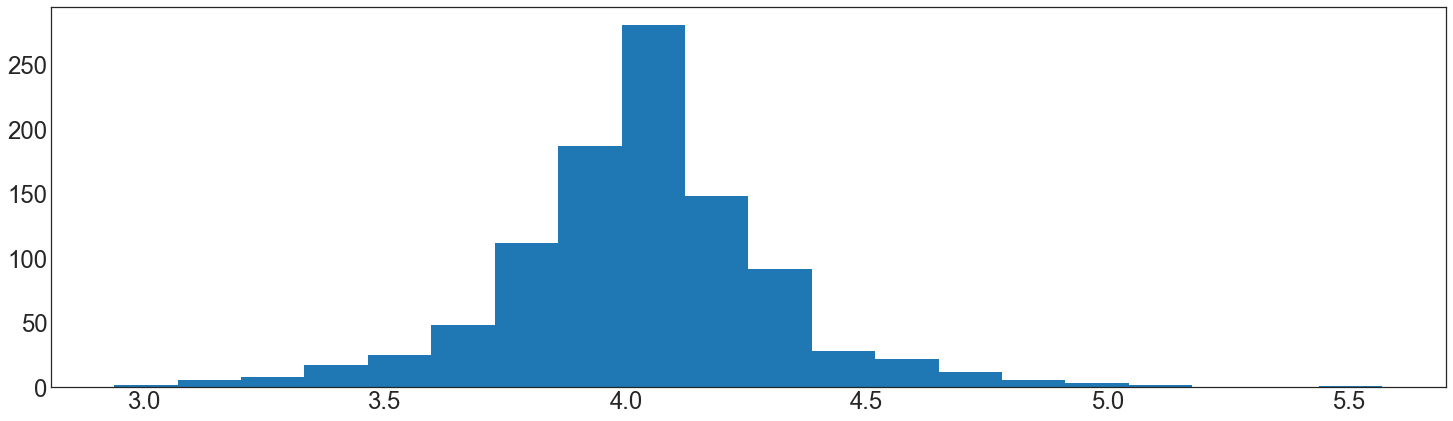

4.029918298679511


In [3]:
trials = []
for t in range(20):
    A = private_mean_with_laplace(values=[0, 0, 0], epsilon=1.0, lower_bound=0, upper_bound=1)
    trials.append(A)
    
plt.hist(trials, bins=20)
plt.show()


trials = []
values = np.random.laplace(4, scale=1, size=1000)

for t in range(1000):
    A = private_mean_with_laplace(values=values, epsilon=0.1, lower_bound=0, upper_bound=20)
    trials.append(A)
    
print(np.mean(values))

plt.hist(values, bins=20)
plt.show()
plt.hist(trials, bins=20)
plt.show()

print(np.mean(trials))
